# Full Processing of UVJ Data for the ZFourge Survey
This script is used to perform the processing of data generated using the template extraction script. This script is used to investigate how the UVJ positions of ZFOURGE change with an increasing amount of contamination from the AGN. In addition to this, this script will be used to choose a selection of IDs across each survey which will the be used to generate some more plots for the final paper.

In [1]:
# Import all relevant libraries
import matplotlib.pyplot as plt
import astropy.units as u
import numpy as np
import pandas as pd
import os
from astLib import astSED
import astropy.io.fits as fits
from carf import * # custom module for functions relating to the project
import matplotlib.path as mpath


# So that we can change the helper functions without reloading the kernel
%load_ext autoreload
%autoreload 2

In [2]:
# We would like to read in the fits files that we are exploring in this project
# This is related to the data that we are using
# we will be looking at all fields so it will be easier to read in all required fits files, and all recalculated IDs and combine these 
# into three master dataframes.
# From here we will be able to check the best values for each and eventually select some reliabile samples

zfourge_path = 'datasets/zfourge/'

# Read in ZFourge Data in each field

#CDFS, COSMOS, UDS
cdfs_df = read_zfourge_data('CDFS', zfourge_path)
cosmos_df = read_zfourge_data('COSMOS', zfourge_path)
uds_df = read_zfourge_data('UDS', zfourge_path)


c:\Users\Mitchell\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\Mitchell\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [3]:
# Read in all the recalculated UVJ colours for the id's
# as a dataframe
cdfs_recalcUVJids = pd.read_csv('datasets/zfourge/CDFS_RecalculatedUVJids_full.csv')
cosomos_recalcUVJids = pd.read_csv('datasets/zfourge/COSMOS_RecalculatedUVJids_full.csv')
uds_recalcUVJids = pd.read_csv('datasets/zfourge/UDS_RecalculatedUVJids_full.csv')

# cigale & astSED calculated uvj colours
cigale_uvj_ids = pd.read_csv('outputs/cigale_colours_ids.csv')


# Rename id's to lowercase
cdfs_recalcUVJids = cdfs_recalcUVJids.rename(columns={'ID':'id'})
cosomos_recalcUVJids = cosomos_recalcUVJids.rename(columns={'ID':'id'})
uds_recalcUVJids = uds_recalcUVJids.rename(columns={'ID':'id'})


In [4]:
# Now that we have both the inital dataframe + the recalculated UVJ id's we can merge these together
# after this we should merge all of our dataframes together to create a master dataframe
# This will allow us to easily access all of the data that we need
#cdfs_df = pd.merge(cdfs_df, cdfs_recalcUVJids, on='id')
#cosmos_df = pd.merge(cosmos_df, cosomos_recalcUVJids, on='id')
#uds_df = pd.merge(uds_df, uds_recalcUVJids, on='id')
cigale_uvj_ids = cigale_uvj_ids.rename(columns={'ID':'id'})

In [5]:
cigale_uvj_ids

,id,UV,VJ,zpk
0,CDFS_22468,0.790783,1.090045,1.6739
1,CDFS_16807,0.509884,0.225754,1.5228
2,CDFS_11281,0.742645,0.450610,1.5864
3,CDFS_10413,0.646226,0.325980,1.5003
4,CDFS_13143,0.646008,0.326934,1.4925
...,...,...,...,...
434,UDS_13883,1.380354,0.863838,0.8058
435,UDS_1887,1.473628,0.972323,0.4364
436,UDS_17475,1.560590,1.375327,1.0974
437,UDS_19012,2.224120,1.325729,0.4129


In [6]:
cdfs_df

,recno,id,xpos,ypos,RAJ2000,DEJ2000,SE,isoArea,FKsap,e_FKsap,...,lmass,mag_U,mag_V,mag_J,e_mag_U,e_mag_V,e_mag_J,UV,VJ,field
0,1,CDFS_1,4078.527,203.090,53.100105,-27.966728,19,5484.0,73.39300,0.26373,...,11.56,22.128170,20.068596,18.985397,24.137389,23.296963,23.137208,2.059573,1.083200,CDFS
1,2,CDFS_2,6292.975,55.927,52.995632,-27.972803,2,315.0,9.56143,0.25146,...,9.05,24.007524,23.108191,22.593727,27.869360,28.547027,27.633753,0.899333,0.514464,CDFS
2,3,CDFS_3,1791.772,51.199,53.207989,-27.973034,2,375.0,10.82121,0.26373,...,10.42,24.823751,23.283146,21.851087,27.891747,26.678404,26.468798,1.540605,1.432059,CDFS
3,4,CDFS_4,4181.315,176.410,53.095257,-27.967840,3,1060.0,76.36145,0.26373,...,11.83,19.589616,17.675879,18.227869,inf,inf,inf,1.913737,-0.551990,CDFS
4,5,CDFS_5,5997.950,48.860,53.009548,-27.973110,0,219.0,26.52806,0.25146,...,10.51,21.702808,21.837879,22.405160,27.903116,28.089700,28.370834,-0.135071,-0.567281,CDFS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30906,30907,CDFS_30907,4150.499,7668.344,53.096783,-27.655676,0,124.0,3.93497,0.23131,...,10.08,24.231164,23.969626,23.632093,27.952808,25.379935,28.327743,0.261538,0.337533,CDFS
30907,30908,CDFS_30908,3050.447,7621.582,53.148533,-27.657625,0,195.0,10.53820,0.20227,...,10.56,26.596601,24.346522,22.435589,inf,inf,inf,2.250080,1.910933,CDFS
30908,30909,CDFS_30909,4385.049,7547.789,53.085751,-27.660698,0,18.0,0.74274,0.22289,...,9.60,25.601854,25.571331,24.955310,30.083650,30.589700,31.567715,0.030524,0.616021,CDFS
30909,30910,CDFS_30910,3221.845,7527.777,53.140469,-27.661535,0,36.0,0.95773,0.19657,...,9.46,26.265728,25.488033,25.269030,29.331073,30.001668,30.857724,0.777694,0.219003,CDFS


In [7]:
cdfs_recalcUVJids

,id,UV_0,VJ_0,UV_10,VJ_10,UV_20,VJ_20,UV_30,VJ_30,UV_40,...,UV_60,VJ_60,UV_70,VJ_70,UV_80,VJ_80,UV_90,VJ_90,UV_100,VJ_100
0,CDFS_10002,0.665009,0.304734,0.655083,0.311125,0.645617,0.317238,0.636579,0.323093,0.627940,...,0.611758,0.339259,0.604169,0.344227,0.596888,0.349006,0.589896,0.353605,0.583175,0.358034
1,CDFS_10003,1.032610,-0.302286,1.012378,-0.278092,0.993195,-0.255233,0.974978,-0.233596,0.957655,...,0.925428,-0.175078,0.910411,-0.157437,0.896059,-0.140617,0.882328,-0.124559,0.869176,-0.109211
2,CDFS_10011,1.398111,0.642368,1.370677,0.641760,1.344622,0.641167,1.319836,0.640590,1.296223,...,1.252180,0.638944,1.231602,0.638422,1.211898,0.637913,1.193012,0.637416,1.174890,0.636930
3,CDFS_10019,0.784209,0.479195,0.769046,0.481857,0.754723,0.484400,0.741171,0.486832,0.728327,...,0.704551,0.493528,0.693525,0.495581,0.683019,0.497552,0.672996,0.499448,0.663424,0.501271
4,CDFS_10020,0.942698,-0.037511,0.923542,-0.020788,0.905436,-0.004948,0.888294,0.010080,0.872038,...,0.841920,0.050878,0.827940,0.063218,0.814611,0.075001,0.801887,0.086265,0.789727,0.097043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7313,CDFS_9983,0.262188,0.789646,0.261482,0.783638,0.260822,0.777991,0.260204,0.772674,0.259624,...,0.258565,0.758435,0.258081,0.754185,0.257623,0.750151,0.257189,0.746318,0.256779,0.742670
7314,CDFS_9988,0.364086,0.138944,0.360367,0.155103,0.356867,0.170144,0.353568,0.184179,0.350451,...,0.344712,0.221179,0.342063,0.232063,0.339546,0.242327,0.337153,0.252022,0.334873,0.261196
7315,CDFS_9992,0.566499,0.465811,0.557076,0.469227,0.548188,0.472466,0.539790,0.475542,0.531842,...,0.517158,0.483906,0.510362,0.486440,0.503895,0.488860,0.497732,0.491174,0.491854,0.493390
7316,CDFS_9994,0.249918,0.071604,0.249657,0.091980,0.249411,0.110805,0.249179,0.128252,0.248961,...,0.248559,0.173703,0.248373,0.186927,0.248197,0.199337,0.248030,0.211008,0.247870,0.222004


In [8]:
# Merge the recalculated UVJ id's with the original dataframes
cdfs_df = pd.merge(cdfs_df, cdfs_recalcUVJids, on='id')
cosmos_df = pd.merge(cosmos_df, cosomos_recalcUVJids, on='id')
uds_df = pd.merge(uds_df, uds_recalcUVJids, on='id')


In [9]:
# See if this worked
# We are now able to put all the dataframes into one dataframe
# This will allow us to easily access all the data that we need

# Making one dataframe
frames = [cdfs_df, cosmos_df, uds_df]
zfourge_df = pd.concat(frames)



In [10]:
# Before we continue we must look to see the distribution of values that have moved based on calculations
# We will look at the recalculated UVJ values and see how many have changed with the new method
# Removing significant changes for the time being 

zfourge_df['vector_magnitude_original'] = np.sqrt(zfourge_df['UV']**2 + zfourge_df['VJ']**2)
zfourge_df['vector_magnitude_recalculated'] = np.sqrt(zfourge_df['UV_0']**2 + zfourge_df['VJ_0']**2)


# now we can calculate the difference between the two
zfourge_df['vector_magnitude_difference'] = abs(zfourge_df['vector_magnitude_original'] - zfourge_df['vector_magnitude_recalculated'])


# Do the same for cigale uvj colours
cigale_uvj_ids['vector_magnitude_original'] = np.sqrt(cigale_uvj_ids['UV']**2 + cigale_uvj_ids['VJ']**2)

# create a zfourge_df subset containing uvj id's from cigale
zfourge_df_cigale = zfourge_df[zfourge_df['id'].isin(cigale_uvj_ids['id'])]
# reset index
zfourge_df_cigale = zfourge_df_cigale.reset_index(drop=True)

In [11]:
zfourge_df

,recno,id,xpos,ypos,RAJ2000,DEJ2000,SE,isoArea,FKsap,e_FKsap,...,FK,e_FK,w_FK,FY,e_FY,w_FY,wminAll,vector_magnitude_original,vector_magnitude_recalculated,vector_magnitude_difference
0,5886,CDFS_5886,4903.505,2218.433,53.061234,-27.882744,3,182.0,3.09289,0.10266,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.709569,0.801514,0.091944
1,5928,CDFS_5928,4865.992,2198.946,53.063004,-27.883558,3,68.0,3.42457,0.10040,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.943349,2.042548,0.099199
2,5972,CDFS_5972,4686.141,2261.246,53.071480,-27.880964,2,300.0,8.39165,0.08648,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.342379,1.444479,0.102101
3,6034,CDFS_6034,4700.024,2220.552,53.070828,-27.882660,3,30.0,0.51288,0.09210,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.999747,1.102889,0.103142
4,6049,CDFS_6049,4693.510,2218.716,53.071133,-27.882736,3,16.0,0.33930,0.09267,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.750887,0.689319,0.061568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6307,22073,UDS_22073,893.519,4929.281,34.391899,-5.111294,0,58.0,1.03939,0.07892,...,2.13933,0.21462,0.77,NaN,NaN,0.0,0.67,0.874474,0.944592,0.070118
6308,22077,UDS_22077,529.058,4942.281,34.407147,-5.110752,3,161.0,3.08937,0.08013,...,7.73447,0.23584,0.85,NaN,NaN,0.0,0.65,1.551113,1.694415,0.143301
6309,22078,UDS_22078,982.913,4997.860,34.388161,-5.108436,0,167.0,5.49590,0.08340,...,14.09349,0.24023,0.76,NaN,NaN,0.0,0.60,1.013392,1.145598,0.132206
6310,22086,UDS_22086,4080.163,4739.570,34.258579,-5.119182,0,130.0,2.54756,0.06966,...,6.28376,0.20835,1.06,NaN,NaN,0.0,0.86,0.951695,0.999183,0.047488


In [12]:
zfourge_df_cigale['vector_magnitude_recalculated_cigale'] = abs(cigale_uvj_ids['vector_magnitude_original'] - zfourge_df_cigale['vector_magnitude_original'])
zfourge_df_cigale['vector_magnitude_difference_cigale'] = abs(cigale_uvj_ids['vector_magnitude_original']  - zfourge_df_cigale['vector_magnitude_recalculated'])

In [13]:
# Use seaborn to plot the histograms
import seaborn as sns



In [14]:
zfourge_df[zfourge_df['field'] == 'CDFS']['vector_magnitude_difference']


0       0.091944
1       0.099199
2       0.102101
3       0.103142
4       0.061568
          ...   
7313    0.041875
7314    0.109897
7315    0.213203
7316    0.126243
7317    0.144715
Name: vector_magnitude_difference, Length: 7318, dtype: float64

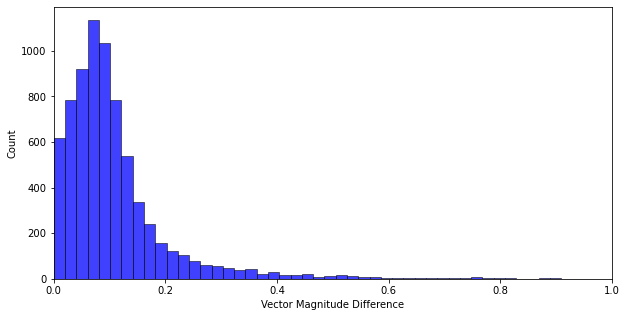

In [15]:
# Plot the histograms
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
# Plot a histogram for each field: UDS, COSMOS, CDFS
sns.histplot(zfourge_df[zfourge_df['field'] == 'CDFS']['vector_magnitude_difference'], bins=100, color='blue', ax=ax)
ax.set_xlabel('Vector Magnitude Difference')
ax.set_ylabel('Count')
ax.set_xlim([0, 1])
plt.savefig('outputs/vector_magnitude_difference_cdfs_example.png')
plt.show()


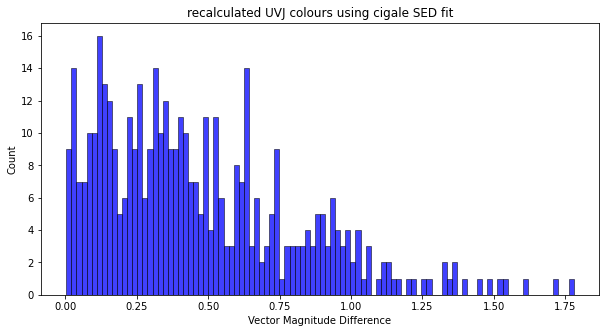

In [16]:
# Plot the histograms
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
# Plot a histogram for each field: UDS, COSMOS, CDFS
sns.histplot(zfourge_df_cigale['vector_magnitude_recalculated_cigale'], bins=100, color='blue', ax=ax)
ax.set_xlabel('Vector Magnitude Difference')
ax.set_ylabel('Count')
ax.set_title("recalculated UVJ colours using cigale SED fit")
#ax.set_xlim([0, 1])
plt.show()


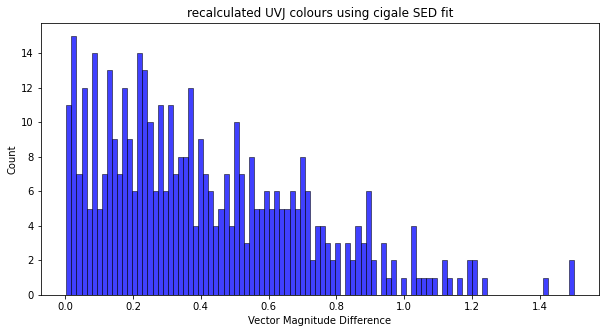

In [17]:
# Plot the histograms
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
# Plot a histogram for each field: UDS, COSMOS, CDFS
sns.histplot(zfourge_df_cigale['vector_magnitude_difference_cigale'], bins=100, color='blue', ax=ax)
ax.set_xlabel('Vector Magnitude Difference')
ax.set_ylabel('Count')
ax.set_title("recalculated UVJ colours using cigale SED fit")
#ax.set_xlim([0, 1])
plt.show()


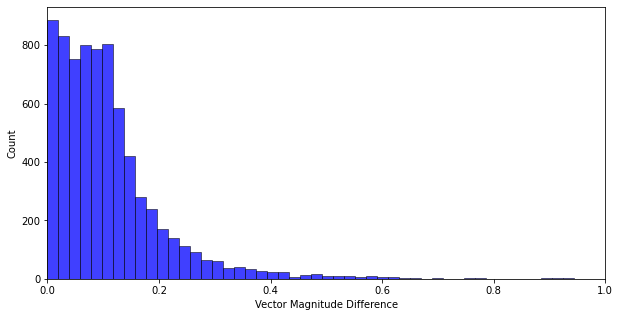

In [18]:
# Plot the histograms
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
# Plot a histogram for each field: UDS, COSMOS, CDFS
sns.histplot(zfourge_df[zfourge_df['field'] == 'COSMOS']['vector_magnitude_difference'], bins=100, color='blue', ax=ax)
ax.set_xlabel('Vector Magnitude Difference')
ax.set_ylabel('Count')
ax.set_xlim([0, 1])
plt.show()

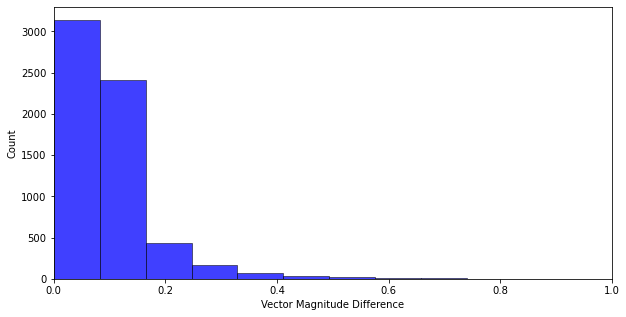

In [19]:
# Plot the histograms
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
# Plot a histogram for each field: UDS, COSMOS, CDFS
sns.histplot(zfourge_df[zfourge_df['field'] == 'UDS']['vector_magnitude_difference'], bins=100, color='blue', ax=ax)
ax.set_xlabel('Vector Magnitude Difference')
ax.set_ylabel('Count')
ax.set_xlim([0, 1])
plt.show()

In [20]:
# We would like to drop all values that have a vector magnitude difference greater than 0.2

# Dropping these values
#zforuge_df = zfourge_df[zfourge_df['vector_magnitude_difference'] < 0.2]




In [21]:
# Plot the UVJ diagram

def plot_uvj_nocategorise(df, x, y):
    plt.figure(figsize=(6, 6))

    xmax = 2.2
    ymax = 2.5
    xmin = -0.5
    ymin = 0

    # Set the plotting limits
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)

    # Define the points for a quiescent galaxy selection
    x_points = [-0.5, 0.85, 1.6, 1.6]
    y_points = [1.3, 1.3, 1.95, 2.5]

    # Plot the points
    plt.plot(x_points, y_points, linestyle='-')

    # Interpolate the y-value at x=1.2
    x_target = 1.2
    y_target = np.interp(x_target, x_points, y_points)

    # Plot the interpolated point, this separates everything on the right as dusty galaxies,
    # and everything on the left as star-forming galaxies
    plt.plot([x_target, x_target], [0, y_target], linestyle='--')

    quiescent_x = [-0.5, 0.85, 1.6, 1.6, xmin, xmin]
    quiescent_y = [1.3, 1.3, 1.95, 2.5, ymax, 1.3]
    # We want to make a wedge selection for the Quiescent Selection of Galaxies
    points = np.column_stack([x, y])
    verts = np.array([quiescent_x, quiescent_y]).T
    path = mpath.Path(verts)


    # Define the path for point selection
    #selected_path = mpath.Path([(2, 3), (6, 4), (8, 2), (2, 1), (2, 3)])  # Example path, replace with your own

    # Use path.contains_points to get a boolean array
    points_inside_selection = path.contains_points(np.column_stack([x, y]))



    dusty_condition = (points[:, 0] > x_target) & (~points_inside_selection)
    star_forming_condition = (points[:, 0] < x_target) & (~points_inside_selection)



    # Filter the DataFrame using the boolean array
    selected_df = df[points_inside_selection] # For quiescent, clean later



    # Sort the quiescent and non-quiescent galaxies
    quiescent_points = points[path.contains_points(points)]
    # Find the points from here to categorise dusty, and star-forming galaxies
    non_quiescent_points = points[~path.contains_points(points)]
    dusty_galaxies_points = non_quiescent_points[non_quiescent_points[:, 0] > x_target]
    star_forming_galaxies_points = non_quiescent_points[non_quiescent_points[:, 0] < x_target]


    #print(non_quiescent_points[0][0])

    #print(y)
    # Plot the selected points
    #plt.scatter(x, y, s=3, alpha=0.5, label='Not Quiescent Selection')
    plt.scatter(quiescent_points[:, 0], quiescent_points[:, 1], c='r', s=3, alpha=0.5, label='Quiescent Selection')
    plt.scatter(dusty_galaxies_points[:, 0], dusty_galaxies_points[:, 1], c='g', s=3, alpha=0.5, label='Dusty Galaxies')
    plt.scatter(star_forming_galaxies_points[:, 0], star_forming_galaxies_points[:, 1], c='b', s=3, alpha=0.5, label='Star Forming Galaxies')

    plt.xlabel('Restframe V-J [Mag]')
    plt.ylabel('Restframe U-V [Mag]')
    plt.title('UVJ Diagram for the CDFS field')
    plt.legend()
    plt.show()

In [22]:
# Plot the UVJ diagram

def plot_uvj_nocategorise(df, x, y):
    plt.figure(figsize=(6, 6))

    xmax = 2.2
    ymax = 2.5
    xmin = -0.5
    ymin = 0

    # Set the plotting limits
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)

    # Define the points for a quiescent galaxy selection
    x_points = [-0.5, 0.85, 1.6, 1.6]
    y_points = [1.3, 1.3, 1.95, 2.5]

    # Plot the points
    plt.plot(x_points, y_points, linestyle='-')

    # Interpolate the y-value at x=1.2
    x_target = 1.2
    y_target = np.interp(x_target, x_points, y_points)

    # Plot the interpolated point, this separates everything on the right as dusty galaxies,
    # and everything on the left as star-forming galaxies
    plt.plot([x_target, x_target], [0, y_target], linestyle='--')

    quiescent_x = [-0.5, 0.85, 1.6, 1.6, xmin, xmin]
    quiescent_y = [1.3, 1.3, 1.95, 2.5, ymax, 1.3]
    # We want to make a wedge selection for the Quiescent Selection of Galaxies
    points = np.column_stack([x, y])
    verts = np.array([quiescent_x, quiescent_y]).T
    path = mpath.Path(verts)


    # Define the path for point selection
    #selected_path = mpath.Path([(2, 3), (6, 4), (8, 2), (2, 1), (2, 3)])  # Example path, replace with your own

    # Use path.contains_points to get a boolean array
    points_inside_selection = path.contains_points(np.column_stack([x, y]))



    dusty_condition = (points[:, 0] > x_target) & (~points_inside_selection)
    star_forming_condition = (points[:, 0] < x_target) & (~points_inside_selection)



    # Filter the DataFrame using the boolean array
    selected_df = df[points_inside_selection] # For quiescent, clean later



    # Sort the quiescent and non-quiescent galaxies
    quiescent_points = points[path.contains_points(points)]
    # Find the points from here to categorise dusty, and star-forming galaxies
    non_quiescent_points = points[~path.contains_points(points)]
    dusty_galaxies_points = non_quiescent_points[non_quiescent_points[:, 0] > x_target]
    star_forming_galaxies_points = non_quiescent_points[non_quiescent_points[:, 0] < x_target]


    #print(non_quiescent_points[0][0])

    #print(y)
    # Plot the selected points
    #plt.scatter(x, y, s=3, alpha=0.5, label='Not Quiescent Selection')
    plt.scatter(quiescent_points[:, 0], quiescent_points[:, 1], c='r', s=3, alpha=0.5, label='Quiescent Selection')
    plt.scatter(dusty_galaxies_points[:, 0], dusty_galaxies_points[:, 1], c='g', s=3, alpha=0.5, label='Dusty Galaxies')
    plt.scatter(star_forming_galaxies_points[:, 0], star_forming_galaxies_points[:, 1], c='b', s=3, alpha=0.5, label='Star Forming Galaxies')

    plt.xlabel('Restframe V-J [Mag]')
    plt.ylabel('Restframe U-V [Mag]')
    plt.title('UVJ Diagram for the CDFS field')
    plt.legend()
    plt.show()

In [30]:
# Now that we have all the data in one dataframe we can start to look at the data
# Importantly we would like to plot how different the data is 

# Plotting a master UVJ diagram
def categorise_uvj(df, x, y, alpha=None):
    #x = df['mag_V'] - df['mag_J'] # VJ Colours 
    #y = df['mag_U'] - df['mag_V'] # UV Colours

    # Plot the UVJ diagram
    plt.figure(figsize=(7, 5))

    xmax = 2.2
    ymax = 2.5
    xmin = -0.5
    ymin = 0

    # Set the plotting limits
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)

    # Define the points for a quiescent galaxy selection
    x_points = [-0.5, 0.85, 1.6, 1.6]
    y_points = [1.3, 1.3, 1.95, 2.5]

    # Plot the points
    plt.plot(x_points, y_points, linestyle='-')

    # Interpolate the y-value at x=1.2
    x_target = 1.2
    y_target = np.interp(x_target, x_points, y_points)

    # Plot the interpolated point, this separates everything on the right as dusty galaxies,
    # and everything on the left as star-forming galaxies
    plt.plot([x_target, x_target], [0, y_target], linestyle='--')

    quiescent_x = [-0.5, 0.85, 1.6, 1.6, xmin, xmin]
    quiescent_y = [1.3, 1.3, 1.95, 2.5, ymax, 1.3]
    # We want to make a wedge selection for the Quiescent Selection of Galaxies
    points = np.column_stack([x, y])
    verts = np.array([quiescent_x, quiescent_y]).T
    path = mpath.Path(verts)
    
    
    # Define the path for point selection
    #selected_path = mpath.Path([(2, 3), (6, 4), (8, 2), (2, 1), (2, 3)])  # Example path, replace with your own

    # Use path.contains_points to get a boolean array
    points_inside_selection = path.contains_points(np.column_stack([x, y]))
    
    
    
    dusty_condition = (points[:, 0] > x_target) & (~points_inside_selection)
    star_forming_condition = (points[:, 0] < x_target) & (~points_inside_selection)
    
    

    # Filter the DataFrame using the boolean array
    selected_df = df[points_inside_selection] # For quiescent, clean later
    

    # Mark dusty, and star-forming galaxies
    if alpha == None:
        df.loc[dusty_condition, f'GalaxyType'] = 2
        df.loc[star_forming_condition, f'GalaxyType'] = 1
        selected_ids = selected_df['id']
        df.loc[df['id'].isin(selected_ids), f'GalaxyType'] = 0
    else:     
        df.loc[dusty_condition, f'GalaxyType_{int(alpha*100)}'] = 2
        df.loc[star_forming_condition, f'GalaxyType_{int(alpha*100)}'] = 1
        selected_ids = selected_df['id']
        df.loc[df['id'].isin(selected_ids), f'GalaxyType_{int(alpha*100)}'] = 0

    #print(selected_df)
    #print(unselected_df)
    
    # Now we can easily select the quiescent galaxies and set the galaxy type to quiescent - 0 or starforming 1.
    #print(selected_df)
     # This is what makes the selection happen
    
    
    
    # Try do the same for the unselected galaxies, noting that the unselected galaxies with x and y > 1.2 are dusty galaxies, and the rest are star-forming galaxies
    #unselected_ids = unselected_df['id']
    
    
    
    
    # Sort the quiescent and non-quiescent galaxies
    quiescent_points = points[path.contains_points(points)]
    # Find the points from here to categorise dusty, and star-forming galaxies
    non_quiescent_points = points[~path.contains_points(points)]
    dusty_galaxies_points = non_quiescent_points[non_quiescent_points[:, 0] > x_target]
    star_forming_galaxies_points = non_quiescent_points[non_quiescent_points[:, 0] < x_target]
    
    
    #print(non_quiescent_points[0][0])
    
    #print(y)
    # Plot the selected points
    #plt.scatter(x, y, s=3, alpha=0.5, label='Not Quiescent Selection')
    plt.scatter(quiescent_points[:, 0], quiescent_points[:, 1], c='r', s=3, alpha=0.5, label='Quiescent Selection')
    plt.scatter(dusty_galaxies_points[:, 0], dusty_galaxies_points[:, 1], c='g', s=3, alpha=0.5, label='Dusty Galaxies')
    plt.scatter(star_forming_galaxies_points[:, 0], star_forming_galaxies_points[:, 1], c='b', s=3, alpha=0.5, label='Star Forming Galaxies')

    plt.xlabel('Restframe V-J [Mag]')
    plt.ylabel('Restframe U-V [Mag]')
    #plt.title('UVJ Diagram using ZFOURGE Galaxies')
    plt.legend()

    plt.savefig('outputs/uvj_diagram_example_original.png')
    plt.show()
    return df

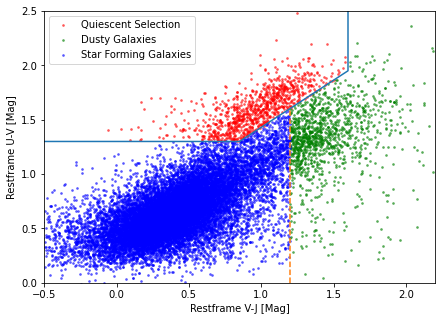

In [31]:
zfourge_df = categorise_uvj(zfourge_df, zfourge_df['VJ'], zfourge_df['UV'])

In [25]:
# For each value of alpha, plot the UVJ diagram
alpha_list = np.linspace(0, 1, 11)

In [26]:
alpha_list

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [ ]:
alpha = 0
zfourge_df = categorise_uvj(zfourge_df, zfourge_df['VJ_{}'.format(int(alpha*100))], zfourge_df['UV_{}'.format(int(alpha*100))], alpha)

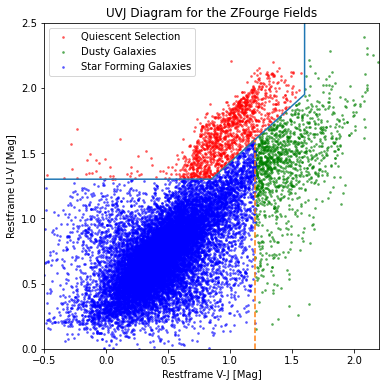

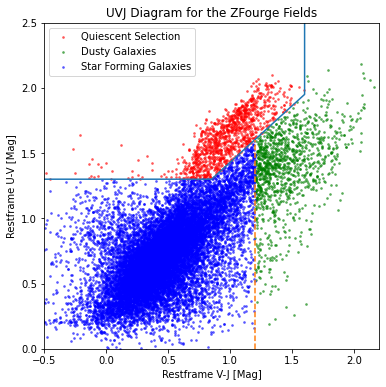

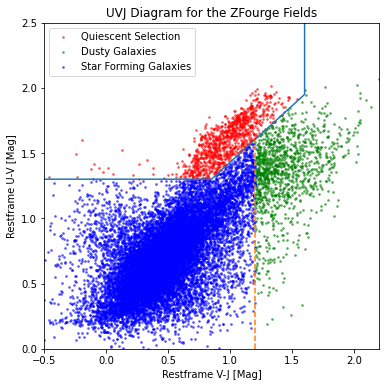

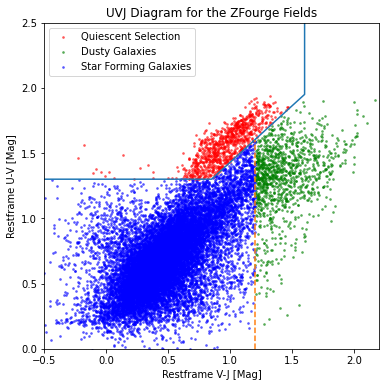

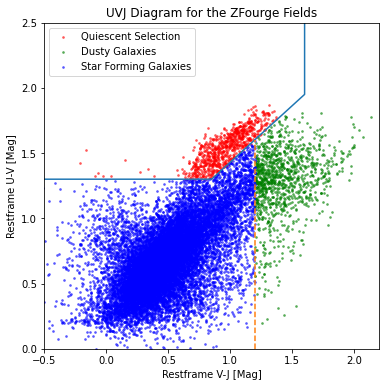

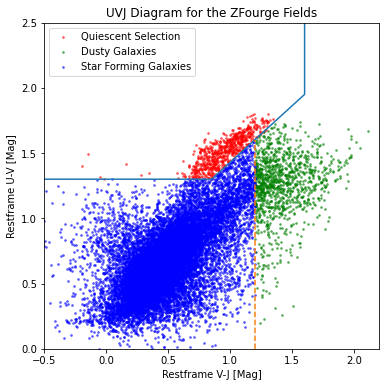

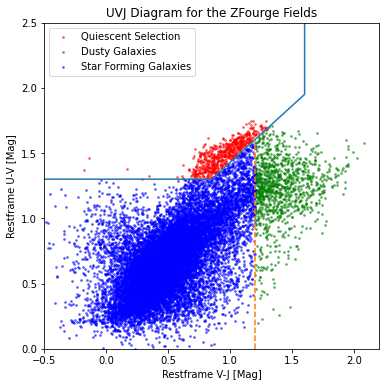

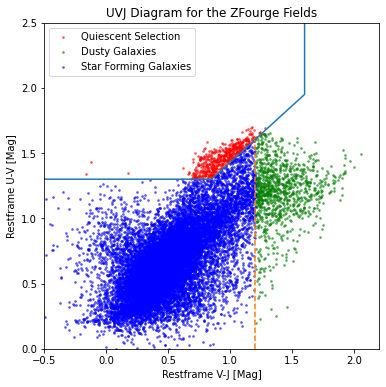

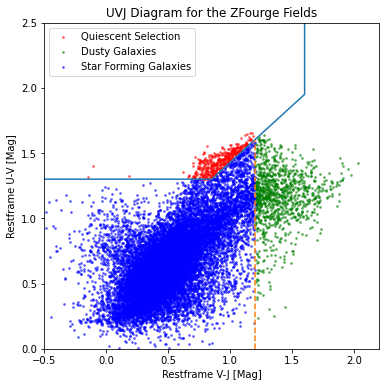

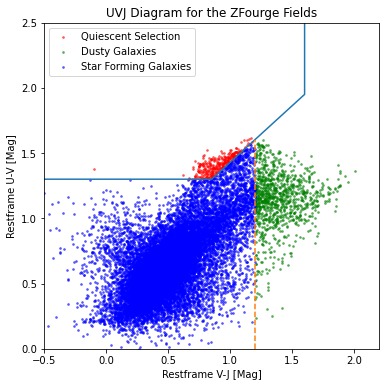

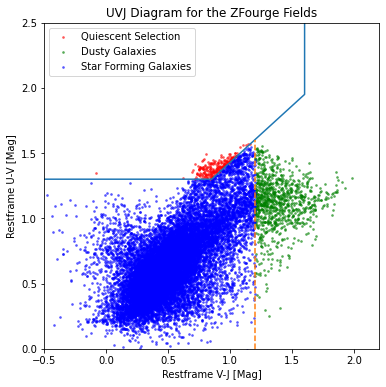

In [500]:
for alpha in alpha_list:
    zfourge_df = categorise_uvj(zfourge_df, zfourge_df['VJ_{}'.format(int(alpha*100))], zfourge_df['UV_{}'.format(int(alpha*100))], alpha)

In [54]:

def categorise_uvj_both(df1, df2, x_col1='x1', y_col1='y1', x_col2='x2', y_col2='y2', alpha=None):
    """
    Plots a UVJ diagram with two DataFrames side-by-side, categorizing galaxies and highlighting selections.

    Args:
        df1, df2: DataFrames containing the galaxy data.
        x_col1, y_col1: Column names in df1 for the x and y values of the UVJ diagram.
        x_col2, y_col2: Column names in df2 for the x and y values of the UVJ diagram.
        alpha: (Optional) Parameter for AGN contamination, used for column naming if provided.
    """

    # Plotting limits and quiescent selection area (same for both plots)
    xmax = 2.2
    ymax = 2.5
    xmin = -0.5
    ymin = 0

    x_points = [-0.5, 0.85, 1.6, 1.6]
    y_points = [1.3, 1.3, 1.95, 2.5]
    x_target = 1.2
    y_target = np.interp(x_target, x_points, y_points)

    quiescent_x = [-0.5, 0.85, 1.6, 1.6, xmin, xmin]
    quiescent_y = [1.3, 1.3, 1.95, 2.5, ymax, 1.3]
    verts = np.array([quiescent_x, quiescent_y]).T
    path = mpath.Path(verts)

    # Create subplots
    fig, axs = plt.subplots(1, 2, figsize=(6, 6), sharey=True, sharex=True)

    # Helper function to classify and plot for a single DataFrame
    def classify_and_plot(ax, df, x_col, y_col, alpha):
        x, y = df[x_col], df[y_col]
        points = np.column_stack([x, y])
        points_inside_selection = path.contains_points(points)

        dusty_condition = (points[:, 0] > x_target) & (~points_inside_selection)
        star_forming_condition = (points[:, 0] < x_target) & (~points_inside_selection)

        # Classify galaxies 
        if alpha is None:
            df.loc[dusty_condition, 'GalaxyType'] = 2
            df.loc[star_forming_condition, 'GalaxyType'] = 1
            selected_ids = df[points_inside_selection]['id'] 
            df.loc[df['id'].isin(selected_ids), 'GalaxyType'] = 0
        else:
            df.loc[dusty_condition, f'GalaxyType_{int(alpha*100)}'] = 2
            df.loc[star_forming_condition, f'GalaxyType_{int(alpha*100)}'] = 1
            selected_ids = df[points_inside_selection]['id']
            df.loc[df['id'].isin(selected_ids), f'GalaxyType_{int(alpha*100)}'] = 0

        # Plot 
        ax.set_xlim(xmin, xmax)
        ax.set_ylim(ymin, ymax)
        ax.plot(x_points, y_points, linestyle='-')
        ax.plot([x_target, x_target], [0, y_target], linestyle='--')

        quiescent_points = points[path.contains_points(points)]
        non_quiescent_points = points[~path.contains_points(points)]
        dusty_galaxies_points = non_quiescent_points[non_quiescent_points[:, 0] > x_target]
        star_forming_galaxies_points = non_quiescent_points[non_quiescent_points[:, 0] < x_target]

        ax.scatter(quiescent_points[:, 0], quiescent_points[:, 1], c='r', s=3, alpha=0.5, label='Quiescent')
        ax.scatter(dusty_galaxies_points[:, 0], dusty_galaxies_points[:, 1], c='g', s=3, alpha=0.5, label='Dusty')
        ax.scatter(star_forming_galaxies_points[:, 0], star_forming_galaxies_points[:, 1], c='b', s=3, alpha=0.5, label='Star-forming')
        ax.set_xlabel('Restframe V-J [Mag]')
    #    ax.legend()

    # Plot for DataFrame 1
    classify_and_plot(axs[0], df1, x_col1, y_col1, alpha)
    axs[0].set_ylabel('Restframe U-V [Mag]')
    
    # Plot for DataFrame 2
    classify_and_plot(axs[1], df2, x_col2, y_col2, alpha)
    
    # Add one legend
    axs[0].legend()
    # Layout
    plt.tight_layout()
    plt.subplots_adjust(wspace=0.1) 

    # Save or show the plot
    plt.savefig('outputs/uvj_subplots.png', dpi=300, bbox_inches='tight')
    plt.show()

    # Return both modified DataFrames
    return df1, df2

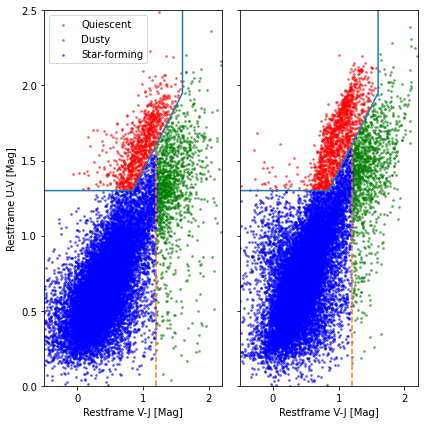

(      recno         id      xpos      ypos    RAJ2000    DEJ2000  SE  isoArea  \
 0      5886  CDFS_5886  4903.505  2218.433  53.061234 -27.882744   3    182.0   
 1      5928  CDFS_5928  4865.992  2198.946  53.063004 -27.883558   3     68.0   
 2      5972  CDFS_5972  4686.141  2261.246  53.071480 -27.880964   2    300.0   
 3      6034  CDFS_6034  4700.024  2220.552  53.070828 -27.882660   3     30.0   
 4      6049  CDFS_6049  4693.510  2218.716  53.071133 -27.882736   3     16.0   
 ...     ...        ...       ...       ...        ...        ...  ..      ...   
 6307  22073  UDS_22073   893.519  4929.281  34.391899  -5.111294   0     58.0   
 6308  22077  UDS_22077   529.058  4942.281  34.407147  -5.110752   3    161.0   
 6309  22078  UDS_22078   982.913  4997.860  34.388161  -5.108436   0    167.0   
 6310  22086  UDS_22086  4080.163  4739.570  34.258579  -5.119182   0    130.0   
 6311  22089  UDS_22089  1936.303  4837.703  34.348274  -5.115107   2    489.0   
 
          FKsa

In [55]:
# Attempt to plot the UVJ diagram for the original and recalculated UVJ colours
alpha = 0
categorise_uvj_both(zfourge_df, zfourge_df, 'VJ', 'UV', 'VJ_{}'.format(int(alpha*100)), 'UV_{}'.format(int(alpha*100)))

In [501]:
# Now we will look at the best 20 sources of each region, in each field.
# that did not move much based on their vector magnitude difference

# For each field, and each region, select the 20 sources with the lowest magnitude difference
n = 300
# CDFS
# Quiescent
cdfs_quiescent = zfourge_df[(zfourge_df['field'] == 'CDFS') & (zfourge_df['GalaxyType'] == 0)].sort_values(by='vector_magnitude_difference').head(n)
# Dusty
cdfs_dusty = zfourge_df[(zfourge_df['field'] == 'CDFS') & (zfourge_df['GalaxyType'] == 2)].sort_values(by='vector_magnitude_difference').head(n)
# Star Forming
cdfs_star_forming = zfourge_df[(zfourge_df['field'] == 'CDFS') & (zfourge_df['GalaxyType'] == 1)].sort_values(by='vector_magnitude_difference').head(n)

# COSMOS
# Quiescent
cosmos_quiescent = zfourge_df[(zfourge_df['field'] == 'COSMOS') & (zfourge_df['GalaxyType'] == 0)].sort_values(by='vector_magnitude_difference').head(n)
# Dusty
cosmos_dusty = zfourge_df[(zfourge_df['field'] == 'COSMOS') & (zfourge_df['GalaxyType'] == 2)].sort_values(by='vector_magnitude_difference').head(n)
# Star Forming
cosmos_star_forming = zfourge_df[(zfourge_df['field'] == 'COSMOS') & (zfourge_df['GalaxyType'] == 1)].sort_values(by='vector_magnitude_difference').head(n)

# UDS
# Quiescent
uds_quiescent = zfourge_df[(zfourge_df['field'] == 'UDS') & (zfourge_df['GalaxyType'] == 0)].sort_values(by='vector_magnitude_difference').head(n)
# Dusty
uds_dusty = zfourge_df[(zfourge_df['field'] == 'UDS') & (zfourge_df['GalaxyType'] == 2)].sort_values(by='vector_magnitude_difference').head(n)
# Star Forming
uds_star_forming = zfourge_df[(zfourge_df['field'] == 'UDS') & (zfourge_df['GalaxyType'] == 1)].sort_values(by='vector_magnitude_difference').head(n)


# Combining these all back into a more refined dataframe,

frames = [cdfs_quiescent, cdfs_dusty, cdfs_star_forming, cosmos_quiescent, cosmos_dusty, cosmos_star_forming, uds_quiescent, uds_dusty, uds_star_forming]
best_sources_df = pd.concat(frames)

best_sources_df = zfourge_df


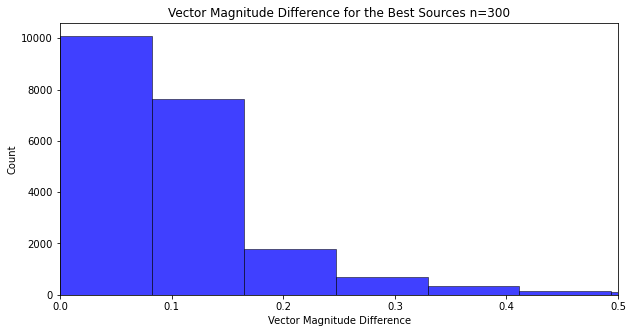

In [502]:
# Checking out the vector magnitude histrogram for the best sources
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
# Plot a histogram for each field: UDS, COSMOS, CDFS
sns.histplot(best_sources_df['vector_magnitude_difference'], bins=100, color='blue', ax=ax)
ax.set_xlabel('Vector Magnitude Difference')
ax.set_ylabel('Count')
ax.set_title('Vector Magnitude Difference for the Best Sources n={}'.format(n))
ax.set_xlim([0, 0.5])
plt.show()


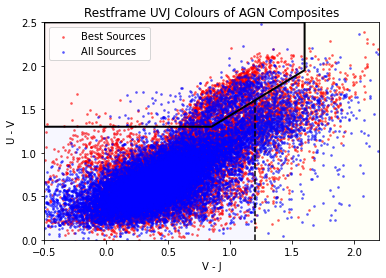

In [503]:
# Now we have a selection of sources that can be considered good sources for the UVJ diagram

# Plot these sources on a UVJ diagram, all of them 

plt.scatter(best_sources_df['VJ_0'], best_sources_df['UV_0'], c='r', s=3, alpha=0.5, label='Best Sources')

plt.scatter(best_sources_df['VJ'], best_sources_df['UV'], c='b', s=3, alpha=0.5, label='All Sources')
plt.ylabel('U - V')
plt.xlabel('V - J')
plt.title("Restframe UVJ Colours of AGN Composites")
plt.xlim([-0.5, 2.2])
plt.ylim([0, 2.5])

# Plot the names
# for i in range(len(selected_ids_df)):
#     #plt.text(selected_ids_df['vj'][i], selected_ids_df['uv'][i], selected_ids_df['id'][i], fontsize=12)
#     plt.text(recalculated_df['VJ'][i], recalculated_df['UV'][i], recalculated_df['ID'][i], fontsize=12)

# Define paths for selections
path_quiescent = [[-0.5, 1.3], [0.85, 1.3], [1.6, 1.95], [1.6, 2.5], [-0.5, 2.5]]
path_sf = [[-0.5, 0.0], [-0.5, 1.3], [0.85, 1.3], [1.2, 1.60333], [1.2, 0.0]]
path_sfd = [[1.2, 0.0], [1.2, 1.60333], [1.6, 1.95], [1.6, 2.5], [2.2, 2.5], [2.2, 0.0]]

# Add patches for selections
plt.gca().add_patch(plt.Polygon(path_quiescent, closed=True, fill=True, facecolor=(1, 0, 0, 0.03), edgecolor='k', linewidth=2, linestyle='solid'))
plt.gca().add_patch(plt.Polygon(path_sf, closed=True, fill=True, facecolor=(0, 0, 1, 0.03)))
plt.gca().add_patch(plt.Polygon(path_sfd, closed=True, fill=True, facecolor=(1, 1, 0, 0.03)))

# Add vertical line
plt.axvline(1.2, color='black', linestyle='--', ymin=0, ymax=1.60333/2.5)
plt.legend()
plt.show()



In [504]:
# So there is a slight shift but it isn't drastically important for this as we are looking at the statistics behind what is actualy happening. We not however that in terms of what is generally tending to be miscalculated is the middle section of the UVJ diagram
# we see that this is one of the thinner parts of the diagram but is important as there is signitifcant shift of approx 1.0 dex due to something it could be due to the way things are being calculated in regards to the middle region or a fitting error that occurs in astSED vs Eazy

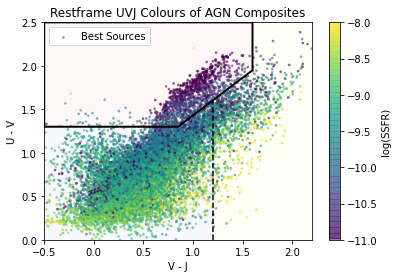

In [505]:
# In doing this we continue and keep the sources here
# Plotting again with a lssfr overlay for each to see if it iin the same general type of spots
# do subplotting to see these graphs side by side

# Create 2 plots, plotting the UVJ diagram for the best sources with inital colours and not inital colours
plt.scatter(best_sources_df['VJ_0'], best_sources_df['UV_0'], c=best_sources_df['lssfr'], cmap='viridis', s=3, alpha=0.5, label='Best Sources')

# limit the colourbar between -8 and -11
plt.colorbar(label='log(SSFR)')

# limit cbar values
plt.clim(-11, -8)

plt.ylabel('U - V')
plt.xlabel('V - J')
plt.title("Restframe UVJ Colours of AGN Composites")
plt.xlim([-0.5, 2.2])
plt.ylim([0, 2.5])

# Plot the names
# for i in range(len(selected_ids_df)):
#     #plt.text(selected_ids_df['vj'][i], selected_ids_df['uv'][i], selected_ids_df['id'][i], fontsize=12)
#     plt.text(recalculated_df['VJ'][i], recalculated_df['UV'][i], recalculated_df['ID'][i], fontsize=12)

# Define paths for selections
path_quiescent = [[-0.5, 1.3], [0.85, 1.3], [1.6, 1.95], [1.6, 2.5], [-0.5, 2.5]]
path_sf = [[-0.5, 0.0], [-0.5, 1.3], [0.85, 1.3], [1.2, 1.60333], [1.2, 0.0]]
path_sfd = [[1.2, 0.0], [1.2, 1.60333], [1.6, 1.95], [1.6, 2.5], [2.2, 2.5], [2.2, 0.0]]

# Add patches for selections
plt.gca().add_patch(plt.Polygon(path_quiescent, closed=True, fill=True, facecolor=(1, 0, 0, 0.03), edgecolor='k', linewidth=2, linestyle='solid'))
plt.gca().add_patch(plt.Polygon(path_sf, closed=True, fill=True, facecolor=(0, 0, 1, 0.03)))
plt.gca().add_patch(plt.Polygon(path_sfd, closed=True, fill=True, facecolor=(1, 1, 0, 0.03)))

# Add vertical line
plt.axvline(1.2, color='black', linestyle='--', ymin=0, ymax=1.60333/2.5)
plt.legend()
plt.show()


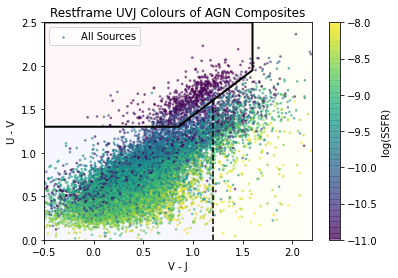

In [506]:


plt.scatter(best_sources_df['VJ'], best_sources_df['UV'], c=best_sources_df['lssfr'], cmap='viridis', s=3, alpha=0.5, label='All Sources')

# limit the colourbar between -8 and -11
plt.colorbar(label='log(SSFR)')

# limit cbar values
plt.clim(-11, -8)

plt.ylabel('U - V')
plt.xlabel('V - J')
plt.title("Restframe UVJ Colours of AGN Composites")
plt.xlim([-0.5, 2.2])
plt.ylim([0, 2.5])

# Plot the names
# for i in range(len(selected_ids_df)):
#     #plt.text(selected_ids_df['vj'][i], selected_ids_df['uv'][i], selected_ids_df['id'][i], fontsize=12)
#     plt.text(recalculated_df['VJ'][i], recalculated_df['UV'][i], recalculated_df['ID'][i], fontsize=12)

# Define paths for selections
path_quiescent = [[-0.5, 1.3], [0.85, 1.3], [1.6, 1.95], [1.6, 2.5], [-0.5, 2.5]]
path_sf = [[-0.5, 0.0], [-0.5, 1.3], [0.85, 1.3], [1.2, 1.60333], [1.2, 0.0]]
path_sfd = [[1.2, 0.0], [1.2, 1.60333], [1.6, 1.95], [1.6, 2.5], [2.2, 2.5], [2.2, 0.0]]

# Add patches for selections
plt.gca().add_patch(plt.Polygon(path_quiescent, closed=True, fill=True, facecolor=(1, 0, 0, 0.03), edgecolor='k', linewidth=2, linestyle='solid'))
plt.gca().add_patch(plt.Polygon(path_sf, closed=True, fill=True, facecolor=(0, 0, 1, 0.03)))
plt.gca().add_patch(plt.Polygon(path_sfd, closed=True, fill=True, facecolor=(1, 1, 0, 0.03)))

# Add vertical line
plt.axvline(1.2, color='black', linestyle='--', ymin=0, ymax=1.60333/2.5)
plt.legend()
plt.show()


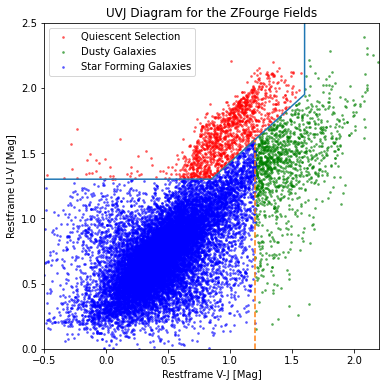

In [507]:
# We now want to look at this distribution, and make a informed selection on each region, recalling that we have actually used the previous code to classify the galaxy type based on UVJ
# we extend this by actually looking at UV_0 and VJ_0

best_sources_df = categorise_uvj(best_sources_df, best_sources_df['VJ_0'], best_sources_df['UV_0'], 0)

We note the expected output, with the UVJ diagram looking much as intended aside from a rather large amount of scatter missing at extreme values of VJ/UV

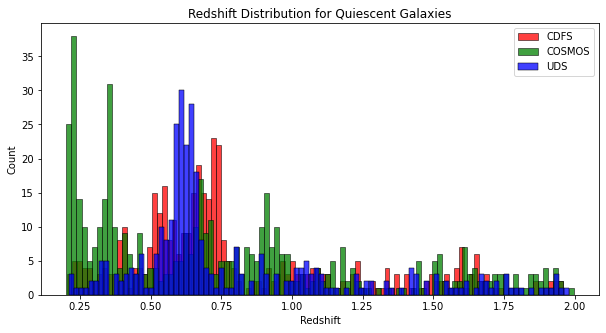

In [508]:
# Using this we may select a quiescent selection from each of the three fields. For completeness we may also select a dusty, and star formaing selection from each of the three fields. Evenetually we will out some id's to see how this evolves the colour space.
# for each of the 3 populations, plot the redshift distributions

# Quiescent: plotting all fields on one histogram
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
# Plot a histogram for each field: UDS, COSMOS, CDFS
#sns.histplot(best_sources_df[(best_sources_df['GalaxyType_0'] == 0)]['zpk'], bins=100, color='blue', ax=ax, label='All Fields')
sns.histplot(best_sources_df[(best_sources_df['GalaxyType_0'] == 0) & (best_sources_df['field'] == 'CDFS')]['zpk'], bins=100, color='red', ax=ax, label='CDFS')
sns.histplot(best_sources_df[(best_sources_df['GalaxyType_0'] == 0) & (best_sources_df['field'] == 'COSMOS')]['zpk'], bins=100, color='green', ax=ax, label='COSMOS')
sns.histplot(best_sources_df[(best_sources_df['GalaxyType_0'] == 0) & (best_sources_df['field'] == 'UDS')]['zpk'], bins=100, color='blue', ax=ax, label='UDS')
ax.set_xlabel('Redshift')
ax.set_ylabel('Count')
ax.set_title('Redshift Distribution for Quiescent Galaxies')
plt.legend()
plt.show()



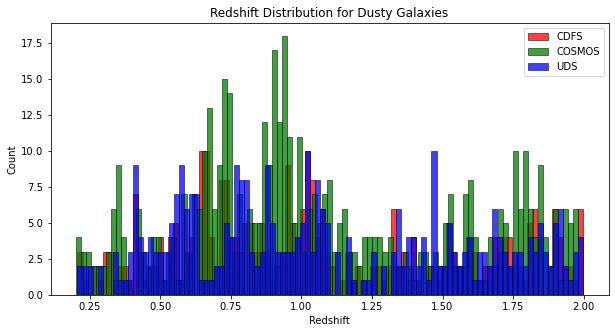

In [509]:
# Dusty: plotting all fields on one histogram
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
# Plot a histogram for each field: UDS, COSMOS, CDFS
#sns.histplot(best_sources_df[(best_sources_df['GalaxyType_0'] == 2)]['zpk'], bins=100, color='blue', ax=ax, label='All Fields')
sns.histplot(best_sources_df[(best_sources_df['GalaxyType_0'] == 2) & (best_sources_df['field'] == 'CDFS')]['zpk'], bins=100, color='red', ax=ax, label='CDFS')
sns.histplot(best_sources_df[(best_sources_df['GalaxyType_0'] == 2) & (best_sources_df['field'] == 'COSMOS')]['zpk'], bins=100, color='green', ax=ax, label='COSMOS')
sns.histplot(best_sources_df[(best_sources_df['GalaxyType_0'] == 2) & (best_sources_df['field'] == 'UDS')]['zpk'], bins=100, color='blue', ax=ax, label='UDS')
ax.set_xlabel('Redshift')
ax.set_ylabel('Count')
ax.set_title('Redshift Distribution for Dusty Galaxies')
plt.legend()
plt.show()

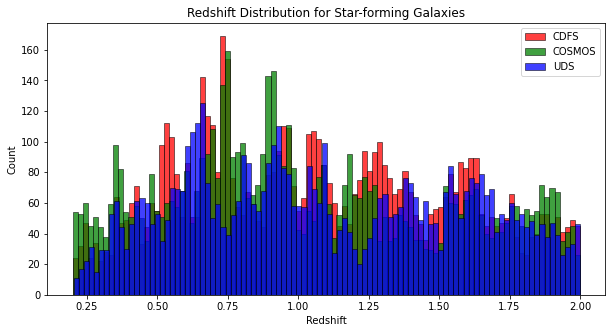

In [510]:
# Finally for starforming
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
# Plot a histogram for each field: UDS, COSMOS, CDFS
#sns.histplot(best_sources_df[(best_sources_df['GalaxyType_0'] == 1)]['zpk'], bins=100, color='blue', ax=ax, label='All Fields')
sns.histplot(best_sources_df[(best_sources_df['GalaxyType_0'] == 1) & (best_sources_df['field'] == 'CDFS')]['zpk'], bins=100, color='red', ax=ax, label='CDFS')
sns.histplot(best_sources_df[(best_sources_df['GalaxyType_0'] == 1) & (best_sources_df['field'] == 'COSMOS')]['zpk'], bins=100, color='green', ax=ax, label='COSMOS')
sns.histplot(best_sources_df[(best_sources_df['GalaxyType_0'] == 1) & (best_sources_df['field'] == 'UDS')]['zpk'], bins=100, color='blue', ax=ax, label='UDS')
ax.set_xlabel('Redshift')
ax.set_ylabel('Count')
ax.set_title('Redshift Distribution for Star-forming Galaxies')
plt.legend()
plt.show()

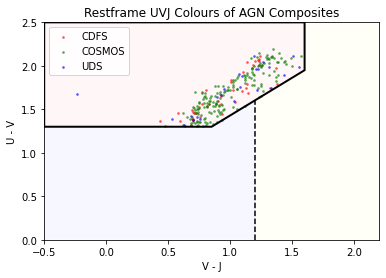

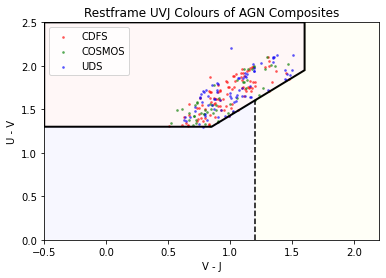

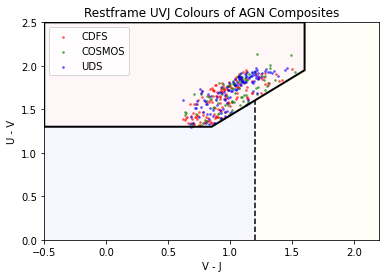

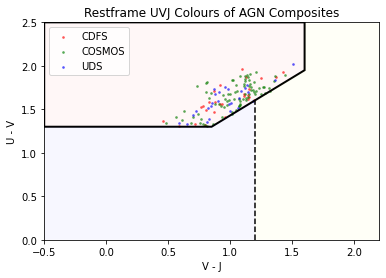

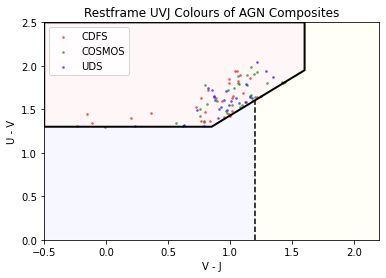

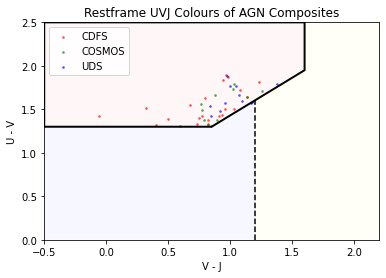

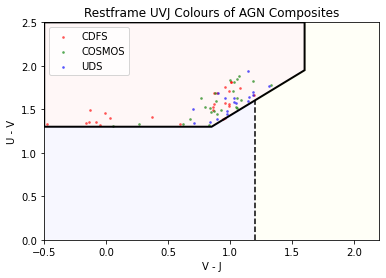

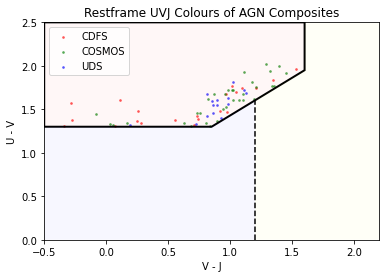

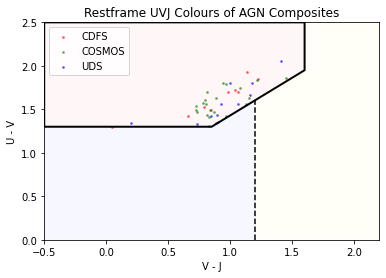

In [511]:
# Now we have an idea of redshift distribution we can look at finidng some good galaxies to investigate
# We importnatly would like to explore and investigate the quiescent galaxies in zfourge.

# To explore this further we split our data into the three fields, and then look at the quiescent galaxies in each field
# We then look at the redshift distribution of these galaxies

# Simply for quiescent galaxies, we want to see how the UVJ colours evolve with redshift

# Plotting the UVJ diagram for the quiescent galaxies in each field
# in redshift bins of 0.2, colour coding by field

# redshift bins
z_bins = np.linspace(0.2, 2, 10)

# for our calculated values, plot the redshift change
# Create 2 plots, plotting the UVJ diagram for the best sources with inital colours and not inital colours

# for each bin, plot the UVJ diagram
for i in range(len(z_bins)-1):
    # Create a dataframe for the redshift bin
    
    # Target each field with a specific colour, specifically looking at the quiescent galaxies
    zfourge_df_bin = zfourge_df[(zfourge_df['zpk'] > z_bins[i]) & (zfourge_df['zpk'] < z_bins[i+1]) & (zfourge_df['GalaxyType_0'] == 0)]
    # Plot the UVJ diagram
    plt.scatter(zfourge_df_bin[zfourge_df_bin['field'] == 'CDFS']['VJ_0'], zfourge_df_bin[zfourge_df_bin['field'] == 'CDFS']['UV_0'], c='r', s=3, alpha=0.5, label='CDFS')
    plt.scatter(zfourge_df_bin[zfourge_df_bin['field'] == 'COSMOS']['VJ_0'], zfourge_df_bin[zfourge_df_bin['field'] == 'COSMOS']['UV_0'], c='g', s=3, alpha=0.5, label='COSMOS')
    plt.scatter(zfourge_df_bin[zfourge_df_bin['field'] == 'UDS']['VJ_0'], zfourge_df_bin[zfourge_df_bin['field'] == 'UDS']['UV_0'], c='b', s=3, alpha=0.5, label='UDS')
    


    # limit cbar values
    plt.clim(-11, -8)

    plt.ylabel('U - V')
    plt.xlabel('V - J')
    plt.title("Restframe UVJ Colours of AGN Composites")
    plt.xlim([-0.5, 2.2])
    plt.ylim([0, 2.5])

    # Plot the names
    # for i in range(len(selected_ids_df)):
    #     #plt.text(selected_ids_df['vj'][i], selected_ids_df['uv'][i], selected_ids_df['id'][i], fontsize=12)
    #     plt.text(recalculated_df['VJ'][i], recalculated_df['UV'][i], recalculated_df['ID'][i], fontsize=12)

    # Define paths for selections
    path_quiescent = [[-0.5, 1.3], [0.85, 1.3], [1.6, 1.95], [1.6, 2.5], [-0.5, 2.5]]
    path_sf = [[-0.5, 0.0], [-0.5, 1.3], [0.85, 1.3], [1.2, 1.60333], [1.2, 0.0]]
    path_sfd = [[1.2, 0.0], [1.2, 1.60333], [1.6, 1.95], [1.6, 2.5], [2.2, 2.5], [2.2, 0.0]]

    # Add patches for selections
    plt.gca().add_patch(plt.Polygon(path_quiescent, closed=True, fill=True, facecolor=(1, 0, 0, 0.03), edgecolor='k', linewidth=2, linestyle='solid'))
    plt.gca().add_patch(plt.Polygon(path_sf, closed=True, fill=True, facecolor=(0, 0, 1, 0.03)))
    plt.gca().add_patch(plt.Polygon(path_sfd, closed=True, fill=True, facecolor=(1, 1, 0, 0.03)))

    # Add vertical line
    plt.axvline(1.2, color='black', linestyle='--', ymin=0, ymax=1.60333/2.5)
    plt.legend()
    plt.show()




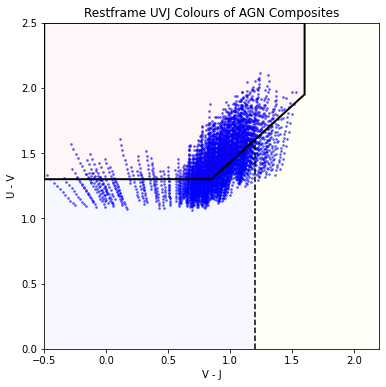

In [512]:
# We see a very particular redshift distribution, with high densities found at earlier redshifts, potentially due to observational bias.
# We now explore more of the UVJ, looking at the paths of the galaxies in the UVJ diagram
# with increasing AGN contribution

# For each alpha value, plot the UVJ diagram, plot the id, with a connecting line (limiting to best 100 sources)
# Quiestcent galaxies
alpha_list = np.linspace(0, 1, 11)


# Redfine cdfs quiescent on the UV_0 and VJ_0 colours
cdfs_quiescent = zfourge_df[(zfourge_df['field'] == 'CDFS') & (zfourge_df['GalaxyType_0'] == 0)]

fig = plt.figure(figsize=(6, 6))

# Plot each value of alpha
for alpha in alpha_list:
    plt.scatter(cdfs_quiescent['VJ_{}'.format(int(alpha*100))], cdfs_quiescent['UV_{}'.format(int(alpha*100))], c='b', s=3, alpha=0.5)
    

plt.ylabel('U - V')
plt.xlabel('V - J')
plt.title("Restframe UVJ Colours of AGN Composites")
plt.xlim([-0.5, 2.2])
plt.ylim([0, 2.5])

# Plot the names
# for i in range(len(selected_ids_df)):
#     #plt.text(selected_ids_df['vj'][i], selected_ids_df['uv'][i], selected_ids_df['id'][i], fontsize=12)
#     plt.text(recalculated_df['VJ'][i], recalculated_df['UV'][i], recalculated_df['ID'][i], fontsize=12)

# Define paths for selections
path_quiescent = [[-0.5, 1.3], [0.85, 1.3], [1.6, 1.95], [1.6, 2.5], [-0.5, 2.5]]
path_sf = [[-0.5, 0.0], [-0.5, 1.3], [0.85, 1.3], [1.2, 1.60333], [1.2, 0.0]]
path_sfd = [[1.2, 0.0], [1.2, 1.60333], [1.6, 1.95], [1.6, 2.5], [2.2, 2.5], [2.2, 0.0]]

# Add patches for selections
plt.gca().add_patch(plt.Polygon(path_quiescent, closed=True, fill=True, facecolor=(1, 0, 0, 0.03), edgecolor='k', linewidth=2, linestyle='solid'))
plt.gca().add_patch(plt.Polygon(path_sf, closed=True, fill=True, facecolor=(0, 0, 1, 0.03)))
plt.gca().add_patch(plt.Polygon(path_sfd, closed=True, fill=True, facecolor=(1, 1, 0, 0.03)))

# Add vertical line
plt.axvline(1.2, color='black', linestyle='--', ymin=0, ymax=1.60333/2.5)

plt.show()






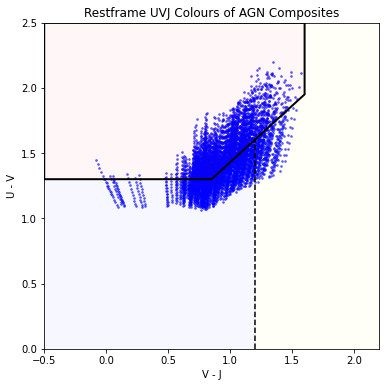

In [513]:
# Creating the same output but in the other two fields
alpha_list = np.linspace(0, 1, 11)


# Redfine cdfs quiescent on the UV_0 and VJ_0 colours
cosmos_quiescent = zfourge_df[(zfourge_df['field'] == 'COSMOS') & (zfourge_df['GalaxyType_0'] == 0)]

fig = plt.figure(figsize=(6, 6))

# Plot each value of alpha
for alpha in alpha_list:
    plt.scatter(cosmos_quiescent['VJ_{}'.format(int(alpha*100))], cosmos_quiescent['UV_{}'.format(int(alpha*100))], c='b', s=3, alpha=0.5)
    

plt.ylabel('U - V')
plt.xlabel('V - J')
plt.title("Restframe UVJ Colours of AGN Composites")
plt.xlim([-0.5, 2.2])
plt.ylim([0, 2.5])

# Plot the names
# for i in range(len(selected_ids_df)):
#     #plt.text(selected_ids_df['vj'][i], selected_ids_df['uv'][i], selected_ids_df['id'][i], fontsize=12)
#     plt.text(recalculated_df['VJ'][i], recalculated_df['UV'][i], recalculated_df['ID'][i], fontsize=12)

# Define paths for selections
path_quiescent = [[-0.5, 1.3], [0.85, 1.3], [1.6, 1.95], [1.6, 2.5], [-0.5, 2.5]]
path_sf = [[-0.5, 0.0], [-0.5, 1.3], [0.85, 1.3], [1.2, 1.60333], [1.2, 0.0]]
path_sfd = [[1.2, 0.0], [1.2, 1.60333], [1.6, 1.95], [1.6, 2.5], [2.2, 2.5], [2.2, 0.0]]

# Add patches for selections
plt.gca().add_patch(plt.Polygon(path_quiescent, closed=True, fill=True, facecolor=(1, 0, 0, 0.03), edgecolor='k', linewidth=2, linestyle='solid'))
plt.gca().add_patch(plt.Polygon(path_sf, closed=True, fill=True, facecolor=(0, 0, 1, 0.03)))
plt.gca().add_patch(plt.Polygon(path_sfd, closed=True, fill=True, facecolor=(1, 1, 0, 0.03)))

# Add vertical line
plt.axvline(1.2, color='black', linestyle='--', ymin=0, ymax=1.60333/2.5)

plt.show()


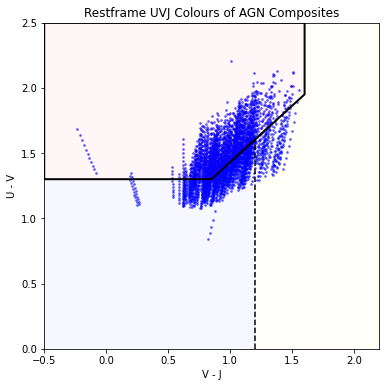

In [514]:
# Finally for UDS
# Redfine cdfs quiescent on the UV_0 and VJ_0 colours
uds_quiescent = zfourge_df[(zfourge_df['field'] == 'UDS') & (zfourge_df['GalaxyType_0'] == 0)]

fig = plt.figure(figsize=(6, 6))

# Plot each value of alpha
for alpha in alpha_list:
    plt.scatter(uds_quiescent['VJ_{}'.format(int(alpha*100))], uds_quiescent['UV_{}'.format(int(alpha*100))], c='b', s=3, alpha=0.5)
    


plt.ylabel('U - V')
plt.xlabel('V - J')
plt.title("Restframe UVJ Colours of AGN Composites")
plt.xlim([-0.5, 2.2])
plt.ylim([0, 2.5])


# Define paths for selections
path_quiescent = [[-0.5, 1.3], [0.85, 1.3], [1.6, 1.95], [1.6, 2.5], [-0.5, 2.5]]
path_sf = [[-0.5, 0.0], [-0.5, 1.3], [0.85, 1.3], [1.2, 1.60333], [1.2, 0.0]]
path_sfd = [[1.2, 0.0], [1.2, 1.60333], [1.6, 1.95], [1.6, 2.5], [2.2, 2.5], [2.2, 0.0]]

# Add patches for selections
plt.gca().add_patch(plt.Polygon(path_quiescent, closed=True, fill=True, facecolor=(1, 0, 0, 0.03), edgecolor='k', linewidth=2, linestyle='solid'))
plt.gca().add_patch(plt.Polygon(path_sf, closed=True, fill=True, facecolor=(0, 0, 1, 0.03)))
plt.gca().add_patch(plt.Polygon(path_sfd, closed=True, fill=True, facecolor=(1, 1, 0, 0.03)))

# Add vertical line
plt.axvline(1.2, color='black', linestyle='--', ymin=0, ymax=1.60333/2.5)

plt.show()

Again we have very similar shapes between each of these. Notably we don't see much of a difference between the fields. For this analysis I would suspect that we would like to consider
galaxies that may have started in the UVJ diagram as purely quiescent, and have moved into the star forming or dusty region when the AGN contribution is 50% or below. We should expect to
find a sample of these galaxies, which we can then plot.

In [515]:
# We look at the quiescents that enter the SF region at agn contribution of 0.5 or below

# For each field, select the quiescent galaxies that enter the star-forming region at an AGN contribution of 0.5 or below, knnowing that this must be compared
# with the inital designation of 0, so check if quiescents GalaxyType_alpha becomes one at alpha = 0.5 or below
# We are also interested in if there are ones that become dusty or starforming
cutoff = 50 # This determines exactly at what cutoff we are investigating

# CDFS
cdfs_quiescent_transition = cdfs_quiescent[(cdfs_quiescent['GalaxyType_0'] == 0) & ((cdfs_quiescent['GalaxyType_{}'.format(cutoff)] == 1) | (cdfs_quiescent['GalaxyType_{}'.format(cutoff)] == 2))]

# COSMOS
cosmos_quiescent_transition = cosmos_quiescent[(cosmos_quiescent['GalaxyType_0'] == 0) & ((cosmos_quiescent['GalaxyType_{}'.format(cutoff)] == 1) | (cosmos_quiescent['GalaxyType_{}'.format(cutoff)] == 2))]

# UDS
uds_quiescent_transition = uds_quiescent[(uds_quiescent['GalaxyType_0'] == 0) & ((uds_quiescent['GalaxyType_{}'.format(cutoff)] == 1) | (uds_quiescent['GalaxyType_{}'.format(cutoff)] == 2))]

In [516]:
uds_quiescent_transition # Seeing this, we can see that with an AGN contribution of 0.5 or below we see approx 100 galaxies from each region that enter the SFR

# We want to find the galaxies that move the most in the UVJ diagram, so we can investigate these further
# We can do this by looking at the vector magnitude difference between the inital and final UVJ colours
# We can then select the top 20 sources from each field

# For each field, and each region, select the 20 sources with the highest vector magnitude difference
n = 150
# CDFS
# Quiescent to star-forming
cdfs_quiescent_transition = cdfs_quiescent_transition.sort_values(by='vector_magnitude_difference', ascending=False).head(n)

cosmos_quiescent_transition = cosmos_quiescent_transition.sort_values(by='vector_magnitude_difference', ascending=False).head(n)

uds_quiescent_transition = uds_quiescent_transition.sort_values(by='vector_magnitude_difference', ascending=False).head(n)




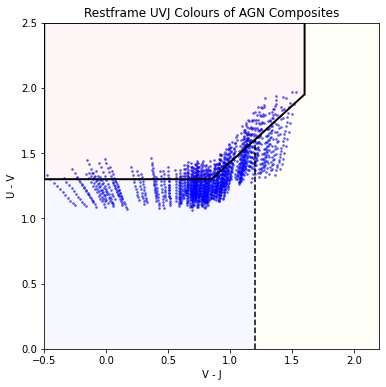

In [517]:
fig = plt.figure(figsize=(6, 6))

# Plot each value of alpha
for alpha in alpha_list:
    plt.scatter(cdfs_quiescent_transition['VJ_{}'.format(int(alpha*100))], cdfs_quiescent_transition['UV_{}'.format(int(alpha*100))], c='b', s=3, alpha=0.5)
    


plt.ylabel('U - V')
plt.xlabel('V - J')
plt.title("Restframe UVJ Colours of AGN Composites")
plt.xlim([-0.5, 2.2])
plt.ylim([0, 2.5])


# Define paths for selections
path_quiescent = [[-0.5, 1.3], [0.85, 1.3], [1.6, 1.95], [1.6, 2.5], [-0.5, 2.5]]
path_sf = [[-0.5, 0.0], [-0.5, 1.3], [0.85, 1.3], [1.2, 1.60333], [1.2, 0.0]]
path_sfd = [[1.2, 0.0], [1.2, 1.60333], [1.6, 1.95], [1.6, 2.5], [2.2, 2.5], [2.2, 0.0]]

# Add patches for selections
plt.gca().add_patch(plt.Polygon(path_quiescent, closed=True, fill=True, facecolor=(1, 0, 0, 0.03), edgecolor='k', linewidth=2, linestyle='solid'))
plt.gca().add_patch(plt.Polygon(path_sf, closed=True, fill=True, facecolor=(0, 0, 1, 0.03)))
plt.gca().add_patch(plt.Polygon(path_sfd, closed=True, fill=True, facecolor=(1, 1, 0, 0.03)))

# Add vertical line
plt.axvline(1.2, color='black', linestyle='--', ymin=0, ymax=1.60333/2.5)

plt.show()

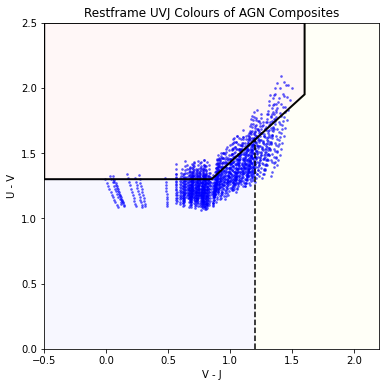

In [518]:
fig = plt.figure(figsize=(6, 6))

# Plot each value of alpha
for alpha in alpha_list:
    plt.scatter(cosmos_quiescent_transition['VJ_{}'.format(int(alpha*100))], cosmos_quiescent_transition['UV_{}'.format(int(alpha*100))], c='b', s=3, alpha=0.5)
    


plt.ylabel('U - V')
plt.xlabel('V - J')
plt.title("Restframe UVJ Colours of AGN Composites")
plt.xlim([-0.5, 2.2])
plt.ylim([0, 2.5])


# Define paths for selections
path_quiescent = [[-0.5, 1.3], [0.85, 1.3], [1.6, 1.95], [1.6, 2.5], [-0.5, 2.5]]
path_sf = [[-0.5, 0.0], [-0.5, 1.3], [0.85, 1.3], [1.2, 1.60333], [1.2, 0.0]]
path_sfd = [[1.2, 0.0], [1.2, 1.60333], [1.6, 1.95], [1.6, 2.5], [2.2, 2.5], [2.2, 0.0]]

# Add patches for selections
plt.gca().add_patch(plt.Polygon(path_quiescent, closed=True, fill=True, facecolor=(1, 0, 0, 0.03), edgecolor='k', linewidth=2, linestyle='solid'))
plt.gca().add_patch(plt.Polygon(path_sf, closed=True, fill=True, facecolor=(0, 0, 1, 0.03)))
plt.gca().add_patch(plt.Polygon(path_sfd, closed=True, fill=True, facecolor=(1, 1, 0, 0.03)))

# Add vertical line
plt.axvline(1.2, color='black', linestyle='--', ymin=0, ymax=1.60333/2.5)

plt.show()

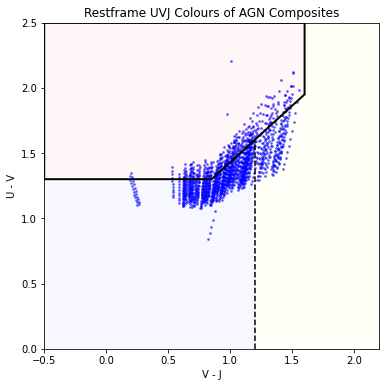

In [519]:
# We again replot these on the UVJ

fig = plt.figure(figsize=(6, 6))

# Plot each value of alpha
for alpha in alpha_list:
    plt.scatter(uds_quiescent_transition['VJ_{}'.format(int(alpha*100))], uds_quiescent_transition['UV_{}'.format(int(alpha*100))], c='b', s=3, alpha=0.5)
    


plt.ylabel('U - V')
plt.xlabel('V - J')
plt.title("Restframe UVJ Colours of AGN Composites")
plt.xlim([-0.5, 2.2])
plt.ylim([0, 2.5])


# Define paths for selections
path_quiescent = [[-0.5, 1.3], [0.85, 1.3], [1.6, 1.95], [1.6, 2.5], [-0.5, 2.5]]
path_sf = [[-0.5, 0.0], [-0.5, 1.3], [0.85, 1.3], [1.2, 1.60333], [1.2, 0.0]]
path_sfd = [[1.2, 0.0], [1.2, 1.60333], [1.6, 1.95], [1.6, 2.5], [2.2, 2.5], [2.2, 0.0]]

# Add patches for selections
plt.gca().add_patch(plt.Polygon(path_quiescent, closed=True, fill=True, facecolor=(1, 0, 0, 0.03), edgecolor='k', linewidth=2, linestyle='solid'))
plt.gca().add_patch(plt.Polygon(path_sf, closed=True, fill=True, facecolor=(0, 0, 1, 0.03)))
plt.gca().add_patch(plt.Polygon(path_sfd, closed=True, fill=True, facecolor=(1, 1, 0, 0.03)))

# Add vertical line
plt.axvline(1.2, color='black', linestyle='--', ymin=0, ymax=1.60333/2.5)

plt.show()

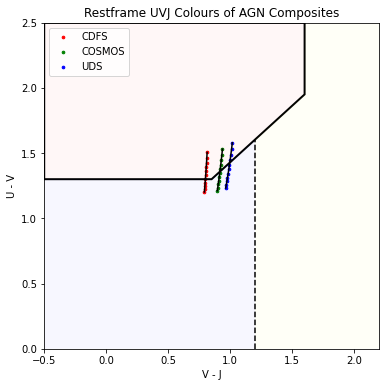

In [520]:
# For each field let us plot an average UVJ diagram for the quiescent galaxies that move to the star-forming region/dusty
fig = plt.figure(figsize=(6, 6))

# Plot each value of alpha
cdfs_mean_values = []
cosmos_mean_values = []
uds_mean_values = []
for alpha in alpha_list:
    # CDFS
    # Calculate the mean values for each value of alpha, and then plot
    cdfs_mean_values.append([cdfs_quiescent_transition['VJ_{}'.format(int(alpha*100))].mean(), cdfs_quiescent_transition['UV_{}'.format(int(alpha*100))].mean()])
    cosmos_mean_values.append([cosmos_quiescent_transition['VJ_{}'.format(int(alpha*100))].mean(), cosmos_quiescent_transition['UV_{}'.format(int(alpha*100))].mean()])
    uds_mean_values.append([uds_quiescent_transition['VJ_{}'.format(int(alpha*100))].mean(), uds_quiescent_transition['UV_{}'.format(int(alpha*100))].mean()])
    
    
    #plt.scatter(uds_quiescent_transition['VJ_{}'.format(int(alpha*100))], uds_quiescent_transition['UV_{}'.format(int(alpha*100))], c='b', s=3, alpha=0.5)
# Plot those mean values
# Plot the values on the uvj
plt.scatter([i[0] for i in cdfs_mean_values], [i[1] for i in cdfs_mean_values], c='r', label='CDFS', s=7)
plt.plot([i[0] for i in cdfs_mean_values], [i[1] for i in cdfs_mean_values], c='k')
plt.scatter([i[0] for i in cosmos_mean_values], [i[1] for i in cosmos_mean_values], c='g', label='COSMOS', s=7)
plt.plot([i[0] for i in cosmos_mean_values], [i[1] for i in cosmos_mean_values], c='k')
plt.scatter([i[0] for i in uds_mean_values], [i[1] for i in uds_mean_values], c='b', label='UDS', s=7)
plt.plot([i[0] for i in uds_mean_values], [i[1] for i in uds_mean_values], c='k')

plt.ylabel('U - V')
plt.xlabel('V - J')
plt.title("Restframe UVJ Colours of AGN Composites")
plt.xlim([-0.5, 2.2])
plt.ylim([0, 2.5])
plt.legend()

# Define paths for selections
path_quiescent = [[-0.5, 1.3], [0.85, 1.3], [1.6, 1.95], [1.6, 2.5], [-0.5, 2.5]]
path_sf = [[-0.5, 0.0], [-0.5, 1.3], [0.85, 1.3], [1.2, 1.60333], [1.2, 0.0]]
path_sfd = [[1.2, 0.0], [1.2, 1.60333], [1.6, 1.95], [1.6, 2.5], [2.2, 2.5], [2.2, 0.0]]

# Add patches for selections
plt.gca().add_patch(plt.Polygon(path_quiescent, closed=True, fill=True, facecolor=(1, 0, 0, 0.03), edgecolor='k', linewidth=2, linestyle='solid'))
plt.gca().add_patch(plt.Polygon(path_sf, closed=True, fill=True, facecolor=(0, 0, 1, 0.03)))
plt.gca().add_patch(plt.Polygon(path_sfd, closed=True, fill=True, facecolor=(1, 1, 0, 0.03)))

# Add vertical line
plt.axvline(1.2, color='black', linestyle='--', ymin=0, ymax=1.60333/2.5)

plt.show()


In [547]:
# Check the line length, from the inital to the final point
# For each field, calculate the line length for each galaxy, and then plot the distribution of these line lengths
# CDFS
linelength_cdfs = np.sqrt((cdfs_quiescent_transition['VJ_0'] - cdfs_quiescent_transition['VJ_{}'.format(cutoff)])**2 + (cdfs_quiescent_transition['UV_0'] - cdfs_quiescent_transition['UV_{}'.format(cutoff)])**2)
linelength_cosmos = np.sqrt((cosmos_quiescent_transition['VJ_0'] - cosmos_quiescent_transition['VJ_{}'.format(cutoff)])**2 + (cosmos_quiescent_transition['UV_0'] - cosmos_quiescent_transition['UV_{}'.format(cutoff)])**2)
linelength_uds = np.sqrt((uds_quiescent_transition['VJ_0'] - uds_quiescent_transition['VJ_{}'.format(cutoff)])**2 + (uds_quiescent_transition['UV_0'] - uds_quiescent_transition['UV_{}'.format(cutoff)])**2)
# remove the outlier above 1 line length
linelength_uds = linelength_uds[linelength_uds < 1]

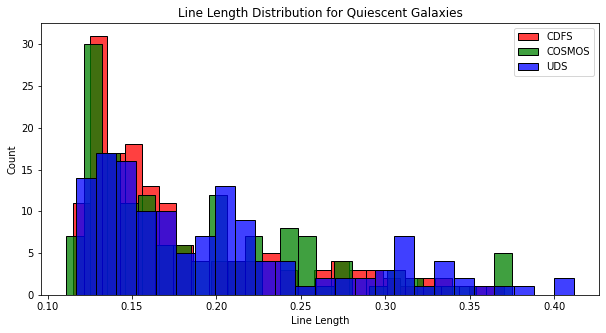

CDFS: 0.1786775346641738
COSMOS: 0.18643344618813687
UDS: 0.20033162182092137


In [548]:
# plot the histrograms for each
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
# Plot a histogram for each field: UDS, COSMOS, CDFS
sns.histplot(linelength_cdfs, bins=25, color='red', ax=ax, label='CDFS')
sns.histplot(linelength_cosmos, bins=25, color='green', ax=ax, label='COSMOS')
sns.histplot(linelength_uds, bins=25, color='blue', ax=ax, label='UDS')
ax.set_xlabel('Line Length')
ax.set_ylabel('Count')
ax.set_title('Line Length Distribution for Quiescent Galaxies')
plt.legend()
plt.show()



# calculate the mean for each
print('CDFS: {}'.format(linelength_cdfs.mean()))
print('COSMOS: {}'.format(linelength_cosmos.mean()))
print('UDS: {}'.format(linelength_uds.mean()))



In [521]:
# Now that we know this, we can potentially find a good selection of galaxies to investigate further
cdfs_quiescent_transition




,recno,id,xpos,ypos,RAJ2000,DEJ2000,SE,isoArea,FKsap,e_FKsap,...,GalaxyType_10,GalaxyType_20,GalaxyType_30,GalaxyType_40,GalaxyType_50,GalaxyType_60,GalaxyType_70,GalaxyType_80,GalaxyType_90,GalaxyType_100
4858,22468,CDFS_22468,5695.570,5491.024,53.024021,-27.746365,2,119.0,3.45224,0.09566,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2821,16807,CDFS_16807,3354.476,4385.840,53.134243,-27.792450,0,17.0,0.24989,0.05285,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
928,11281,CDFS_11281,3150.816,3310.067,53.143845,-27.837273,0,10.0,0.18164,0.05350,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
661,10413,CDFS_10413,2747.377,3146.265,53.162857,-27.844093,0,6.0,0.14315,0.05029,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1542,13143,CDFS_13143,4127.200,3663.224,53.097843,-27.822557,0,9.0,0.18297,0.05264,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4228,20598,CDFS_20598,3357.713,5171.756,53.134090,-27.759703,2,950.0,72.09014,0.05475,...,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
1097,11781,CDFS_11781,4810.306,3471.317,53.065655,-27.830544,3,256.0,9.75327,0.07645,...,0.0,0.0,0.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0
1063,11695,CDFS_11695,5248.115,3402.879,53.045025,-27.833385,3,48.0,0.77831,0.09383,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5191,23445,CDFS_23445,3270.396,5703.914,53.138195,-27.737530,2,195.0,11.39999,0.06855,...,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0


In [522]:
cosmos_quiescent_transition

,recno,id,xpos,ypos,RAJ2000,DEJ2000,SE,isoArea,FKsap,e_FKsap,...,GalaxyType_10,GalaxyType_20,GalaxyType_30,GalaxyType_40,GalaxyType_50,GalaxyType_60,GalaxyType_70,GalaxyType_80,GalaxyType_90,GalaxyType_100
4633,12282,COSMOS_12282,2569.469,3301.346,150.139267,2.310249,0,NaN,0.30609,0.07987,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1751,5117,COSMOS_5117,5117.471,1422.133,150.033020,2.231962,0,NaN,0.53559,0.13062,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5434,14139,COSMOS_14139,3928.558,3765.075,150.082596,2.329576,0,NaN,0.77981,0.07953,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2994,8231,COSMOS_8231,4303.871,2218.409,150.066940,2.265136,0,NaN,0.91446,0.07919,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
6245,16175,COSMOS_16175,1603.771,4295.107,150.179550,2.351647,0,NaN,0.35739,0.07787,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,1748,COSMOS_1748,3628.083,504.891,150.095123,2.193741,3,NaN,181.22110,0.09459,...,0.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
3675,10084,COSMOS_10084,905.738,2687.022,150.208649,2.284642,0,NaN,3.45664,0.09699,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3300,9085,COSMOS_9085,3837.111,2415.414,150.086410,2.273343,0,NaN,9.74806,0.08204,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
285,1433,COSMOS_1433,2419.411,517.920,150.145508,2.194278,2,NaN,2.25603,0.09761,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0


In [523]:
uds_quiescent_transition


,recno,id,xpos,ypos,RAJ2000,DEJ2000,SE,isoArea,FKsap,e_FKsap,...,GalaxyType_10,GalaxyType_20,GalaxyType_30,GalaxyType_40,GalaxyType_50,GalaxyType_60,GalaxyType_70,GalaxyType_80,GalaxyType_90,GalaxyType_100
2981,10945,UDS_10945,4121.219,2764.122,34.256844,-5.201498,2,345.0,13.45039,0.05897,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3813,13931,UDS_13931,499.520,3358.179,34.408382,-5.176762,0,12.0,0.25498,0.05998,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5892,19837,UDS_19837,3741.050,4856.819,34.272770,-5.114299,0,14.0,0.33906,0.06966,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3524,13182,UDS_13182,4149.458,3209.681,34.255665,-5.182931,0,23.0,0.34540,0.05402,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
6073,21136,UDS_21136,4328.380,4988.521,34.248199,-5.108806,0,98.0,1.56911,0.07315,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3790,13883,UDS_13883,3338.557,3355.459,34.289597,-5.176864,0,32.0,0.52937,0.05460,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
123,1887,UDS_1887,895.196,596.709,34.391827,-5.291831,0,91.0,1.73078,0.07362,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5101,17475,UDS_17475,475.070,4143.329,34.409405,-5.144044,0,69.0,1.07307,0.06216,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5677,19012,UDS_19012,430.011,4641.394,34.411289,-5.123290,2,1028.0,85.53130,0.08013,...,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0


In [524]:
# We would now like to the ids for each of these galaxies, their redshifts (photometric), and their field they were selected from
# we would like to do this for each field

# CDFS
cdfs_quiescent_transition[['id', 'zpk', 'field']]
# COSMOS
cosmos_quiescent_transition[['id', 'zpk', 'field']]
# UDS
uds_quiescent_transition[['id', 'zpk', 'field']]



# strip the field id from the id, and then concatenate
cdfs_quiescent_transition['id'] = cdfs_quiescent_transition['id'].str[5:]
cosmos_quiescent_transition['id'] = cosmos_quiescent_transition['id'].str[7:]
uds_quiescent_transition['id'] = uds_quiescent_transition['id'].str[4:]



In [528]:
# Concatenate these, and export
quiescent_transition = pd.concat([cdfs_quiescent_transition, cosmos_quiescent_transition, uds_quiescent_transition])

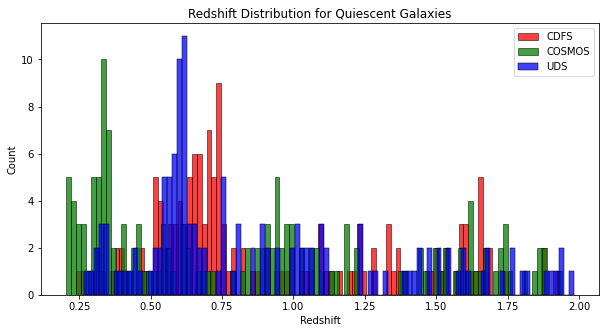

In [531]:
quiescent_transition_ids = quiescent_transition[['id', 'zpk', 'field']]

# plot the distributions of redshifts
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
# Plot a histogram for each field: UDS, COSMOS, CDFS
sns.histplot(quiescent_transition_ids[quiescent_transition_ids['field'] == 'CDFS']['zpk'], bins=100, color='red', ax=ax, label='CDFS')
sns.histplot(quiescent_transition_ids[quiescent_transition_ids['field'] == 'COSMOS']['zpk'], bins=100, color='green', ax=ax, label='COSMOS')
sns.histplot(quiescent_transition_ids[quiescent_transition_ids['field'] == 'UDS']['zpk'], bins=100, color='blue', ax=ax, label='UDS')

ax.set_xlabel('Redshift')
ax.set_ylabel('Count')
ax.set_title('Redshift Distribution for Quiescent Galaxies')
plt.legend()
plt.show()


This shows a very similar distribution to the population distribution from before. Thus what we see if that the values
that move through this space just so happen to be well distributed across the population.

In [532]:
# We may now export the DF 
quiescent_transition_ids.to_csv('outputs/quiescent_transition_ids.csv', index=False)